<a href="https://colab.research.google.com/github/meowClouds/PredictChurn/blob/main/ChurnBinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Assignment/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [7]:
# 2. Initial Data Inspection
# Basic dataset info
print("DATASET INFORMATION")
print("=" * 80)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

DATASET INFORMATION
Shape: 7043 rows × 21 columns

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes



Last 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


In [8]:
# Data types and basic info
print("DATA TYPES AND BASIC INFO")
print("=" * 80)
print("\nData types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

DATA TYPES AND BASIC INFO

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3

In [9]:
# Summary statistics for numerical columns
print("NUMERICAL COLUMNS SUMMARY STATISTICS")
print("=" * 80)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print(df[numerical_cols].describe().T)

NUMERICAL COLUMNS SUMMARY STATISTICS
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
                  count   mean    std    min    25%    50%    75%     max
SeniorCitizen  7043.000  0.162  0.369  0.000  0.000  0.000  0.000   1.000
tenure         7043.000 32.371 24.559  0.000  9.000 29.000 55.000  72.000
MonthlyCharges 7043.000 64.762 30.090 18.250 35.500 70.350 89.850 118.750


In [10]:
# Summary for categorical columns
print("CATEGORICAL COLUMNS SUMMARY")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
print("\nUnique values in each categorical column:")
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

CATEGORICAL COLUMNS SUMMARY
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Unique values in each categorical column:
customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [11]:
# 3. Data Quality Assessment
# Check for missing values
print("MISSING VALUES ANALYSIS")
print("=" * 80)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df.sort_values('Percentage', ascending=False))
else:
    print("No missing values found in the dataset!")


MISSING VALUES ANALYSIS
No missing values found in the dataset!


In [12]:
# Check for special missing values (empty strings, 'NA', etc.)
print("\nChecking for special missing values (empty strings, 'Unknown', etc.):")
for col in df.columns:
    if df[col].dtype == 'object':
        empty_count = (df[col] == ' ').sum() + (df[col] == '').sum() + (df[col].str.strip() == '').sum()
        if empty_count > 0:
            print(f"  {col}: {empty_count} empty values found")

# Check TotalCharges specifically (known to have empty strings)
if 'TotalCharges' in df.columns:
    total_charges_empty = (df['TotalCharges'] == ' ') | (df['TotalCharges'] == '')
    print(f"\nTotalCharges empty strings: {total_charges_empty.sum()}")


Checking for special missing values (empty strings, 'Unknown', etc.):
  TotalCharges: 22 empty values found

TotalCharges empty strings: 11


In [13]:
# Check for duplicates
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated()])
else:
    print("No duplicate rows found!")

# Check for customer ID duplicates
if 'customerID' in df.columns:
    customer_duplicates = df['customerID'].duplicated().sum()
    print(f"\nDuplicate customer IDs: {customer_duplicates}")
    if customer_duplicates > 0:
        print("Warning: Customer IDs should be unique!")

DUPLICATE RECORDS ANALYSIS
Total duplicate rows: 0
No duplicate rows found!

Duplicate customer IDs: 0


In [14]:
# 4. Data Cleaning
# Create a copy for cleaning
df_clean = df.copy()
print("Original dataset shape:", df_clean.shape)

Original dataset shape: (7043, 21)


In [15]:
# Handle TotalCharges column (convert from string to numeric, handle empty strings)
if 'TotalCharges' in df_clean.columns:
    print("\nConverting TotalCharges to numeric...")
    # Replace empty strings with NaN
    df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)
    # Convert to numeric
    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

    # Check how many were converted
    converted_count = df_clean['TotalCharges'].notna().sum()
    print(f"Successfully converted {converted_count} values")
    print(f"Missing after conversion: {df_clean['TotalCharges'].isna().sum()}")


Converting TotalCharges to numeric...
Successfully converted 7032 values
Missing after conversion: 11


In [16]:
# Fill missing TotalCharges (these are likely new customers with tenure=0)
if 'TotalCharges' in df_clean.columns:
    # For customers with tenure=0, TotalCharges should be 0
    mask = (df_clean['TotalCharges'].isna()) & (df_clean['tenure'] == 0)
    df_clean.loc[mask, 'TotalCharges'] = 0

    # For any remaining missing values, we can fill with median
    remaining_missing = df_clean['TotalCharges'].isna().sum()
    if remaining_missing > 0:
        print(f"Filling {remaining_missing} remaining missing TotalCharges with median")
        df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median())

    print(f"Missing TotalCharges after cleaning: {df_clean['TotalCharges'].isna().sum()}")

Missing TotalCharges after cleaning: 0


In [17]:
# Convert SeniorCitizen from 0/1 to categorical
if 'SeniorCitizen' in df_clean.columns:
    print("\nConverting SeniorCitizen to categorical...")
    df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
    print("SeniorCitizen values after conversion:", df_clean['SeniorCitizen'].unique())


Converting SeniorCitizen to categorical...
SeniorCitizen values after conversion: ['No' 'Yes']


In [18]:
# Check for inconsistent values in categorical columns
print("\nChecking for inconsistent categorical values...")
for col in df_clean.select_dtypes(include=['object']).columns:
    if col not in ['customerID', 'TotalCharges']:  # Skip ID and already converted
        unique_vals = df_clean[col].unique()
        if len(unique_vals) < 20:  # Only print for columns with few unique values
            print(f"\n{col} ({len(unique_vals)} unique values):")
            for val in sorted(unique_vals):
                count = (df_clean[col] == val).sum()
                print(f"  '{val}': {count} records")


Checking for inconsistent categorical values...

gender (2 unique values):
  'Female': 3488 records
  'Male': 3555 records

SeniorCitizen (2 unique values):
  'No': 5901 records
  'Yes': 1142 records

Partner (2 unique values):
  'No': 3641 records
  'Yes': 3402 records

Dependents (2 unique values):
  'No': 4933 records
  'Yes': 2110 records

PhoneService (2 unique values):
  'No': 682 records
  'Yes': 6361 records

MultipleLines (3 unique values):
  'No': 3390 records
  'No phone service': 682 records
  'Yes': 2971 records

InternetService (3 unique values):
  'DSL': 2421 records
  'Fiber optic': 3096 records
  'No': 1526 records

OnlineSecurity (3 unique values):
  'No': 3498 records
  'No internet service': 1526 records
  'Yes': 2019 records

OnlineBackup (3 unique values):
  'No': 3088 records
  'No internet service': 1526 records
  'Yes': 2429 records

DeviceProtection (3 unique values):
  'No': 3095 records
  'No internet service': 1526 records
  'Yes': 2422 records

TechSuppor

In [19]:
# Create additional useful features for analysis
print("\nCreating additional features for analysis...")

# Create tenure groups
df_clean['tenure_group'] = pd.cut(df_clean['tenure'],
                                  bins=[0, 12, 24, 36, 48, 60, 72],
                                  labels=['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr'])

# Create monthly charge groups
df_clean['MonthlyCharges_group'] = pd.qcut(df_clean['MonthlyCharges'], q=4,
                                           labels=['Low', 'Medium', 'High', 'Very High'])

# Create total charges groups
df_clean['TotalCharges_group'] = pd.qcut(df_clean['TotalCharges'], q=4,
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# Count number of services
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies']

# Create a binary indicator for each service (excluding 'No internet service' and 'No phone service')
def has_service(x):
    if isinstance(x, str):
        return 1 if x == 'Yes' else 0
    return 0

for col in service_columns:
    if col in df_clean.columns:
        service_col_name = f"{col}_binary"
        df_clean[service_col_name] = df_clean[col].apply(has_service)

# Sum up all services
binary_service_cols = [col for col in df_clean.columns if '_binary' in col]
df_clean['num_services'] = df_clean[binary_service_cols].sum(axis=1)

print("Additional features created successfully!")
print(f"Clean dataset shape: {df_clean.shape}")


Creating additional features for analysis...
Additional features created successfully!
Clean dataset shape: (7043, 33)


TARGET VARIABLE ANALYSIS: CHURN

Churn Distribution:
Churn      Count      Percentage
-----------------------------------
No         5174       73.46     %
Yes        1869       26.54     %


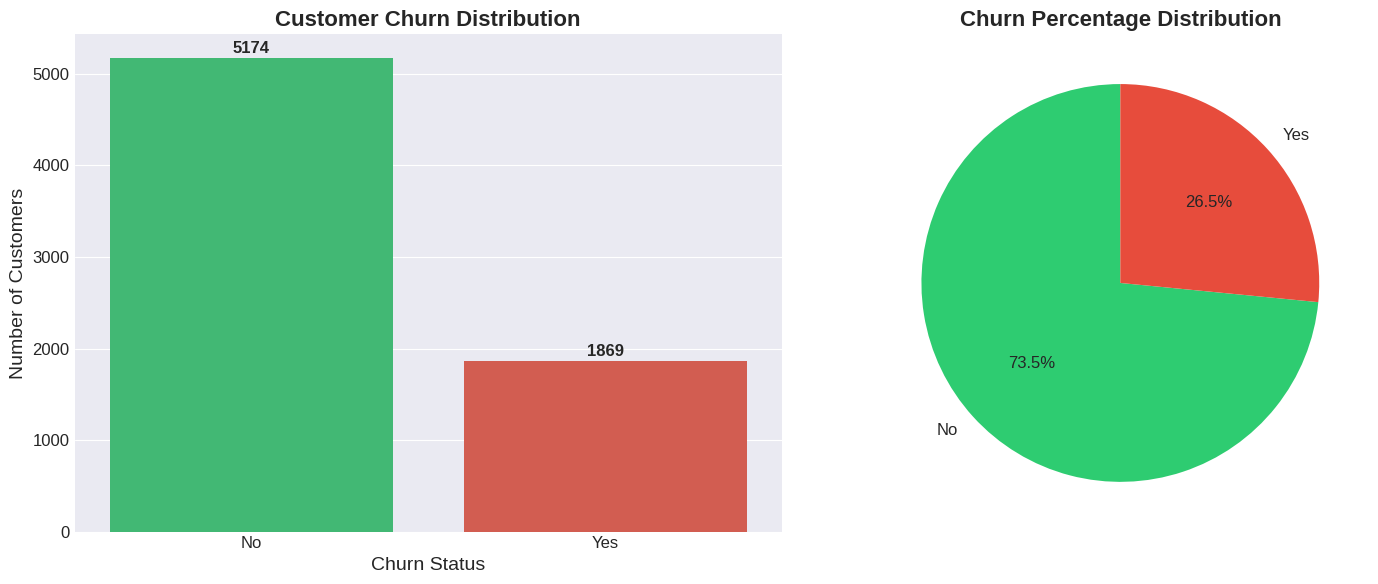

In [20]:
# 5. Target Variable Analysis (Churn)
print("TARGET VARIABLE ANALYSIS: CHURN")
print("=" * 80)


# Churn distribution
churn_counts = df_clean['Churn'].value_counts()
churn_percentage = df_clean['Churn'].value_counts(normalize=True) * 100

print(f"\nChurn Distribution:")
print(f"{'Churn':<10} {'Count':<10} {'Percentage':<10}")
print("-" * 35)
for idx in churn_counts.index:
    print(f"{idx:<10} {churn_counts[idx]:<10} {churn_percentage[idx]:<10.2f}%")


# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(x='Churn', data=df_clean, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Customer Churn Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=14)
axes[0].set_ylabel('Number of Customers', fontsize=14)
for i, count in enumerate(churn_counts.values):
    axes[0].text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Churn Percentage Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

CHURN RATE OVER TIME

Churn rate by tenure group:


Churn,No,Yes
tenure_group,,
0-1yr,52.321839,47.678161
1-2yr,71.289062,28.710938
2-3yr,78.365385,21.634615
3-4yr,80.971129,19.028871
4-5yr,85.576923,14.423077
5-6yr,93.390192,6.609808


<Figure size 1200x600 with 0 Axes>

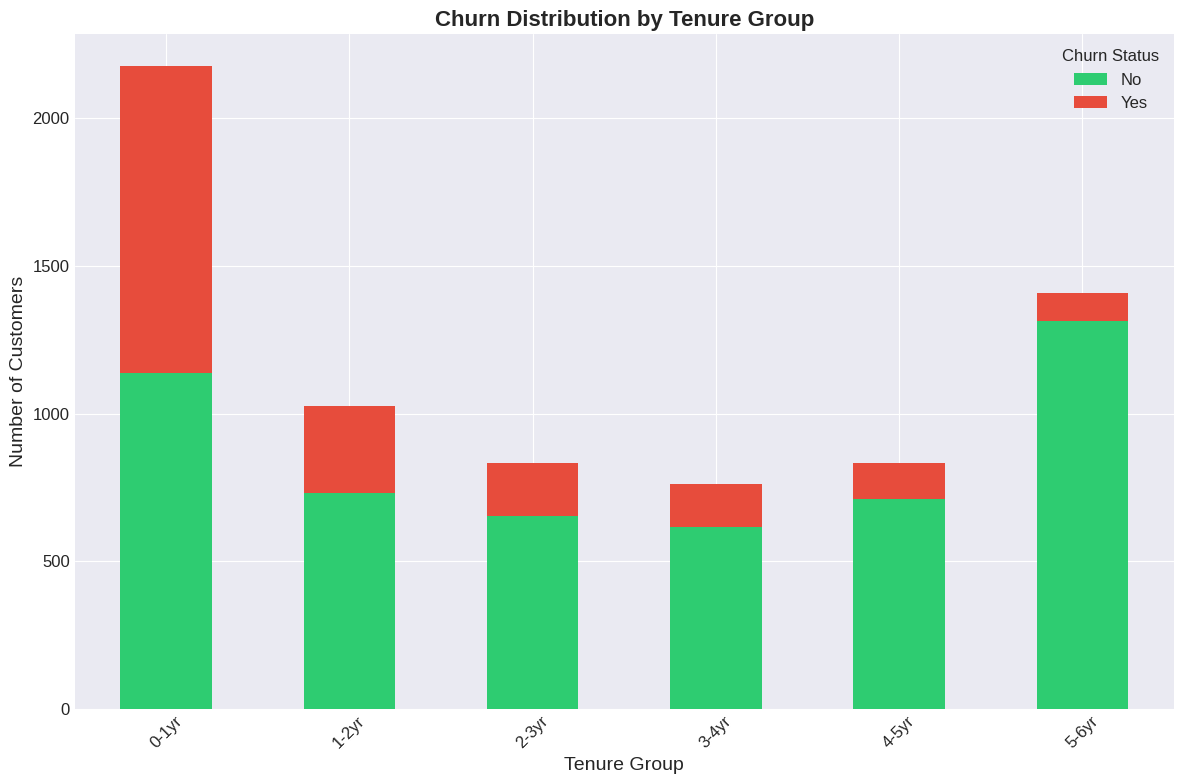

In [21]:
# Churn rate by different time periods
print("CHURN RATE OVER TIME")
print("=" * 80)

# Churn by tenure
print("\nChurn rate by tenure group:")
tenure_churn = pd.crosstab(df_clean['tenure_group'], df_clean['Churn'], normalize='index') * 100
display(tenure_churn.style.background_gradient(cmap='Reds'))

# Visualize
plt.figure(figsize=(12, 6))
tenure_churn_plot = pd.crosstab(df_clean['tenure_group'], df_clean['Churn'])
tenure_churn_plot.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'])
plt.title('Churn Distribution by Tenure Group', fontsize=16, fontweight='bold')
plt.xlabel('Tenure Group', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Churn Status', loc='upper right')
plt.tight_layout()
plt.show()


DEMOGRAPHIC ANALYSIS


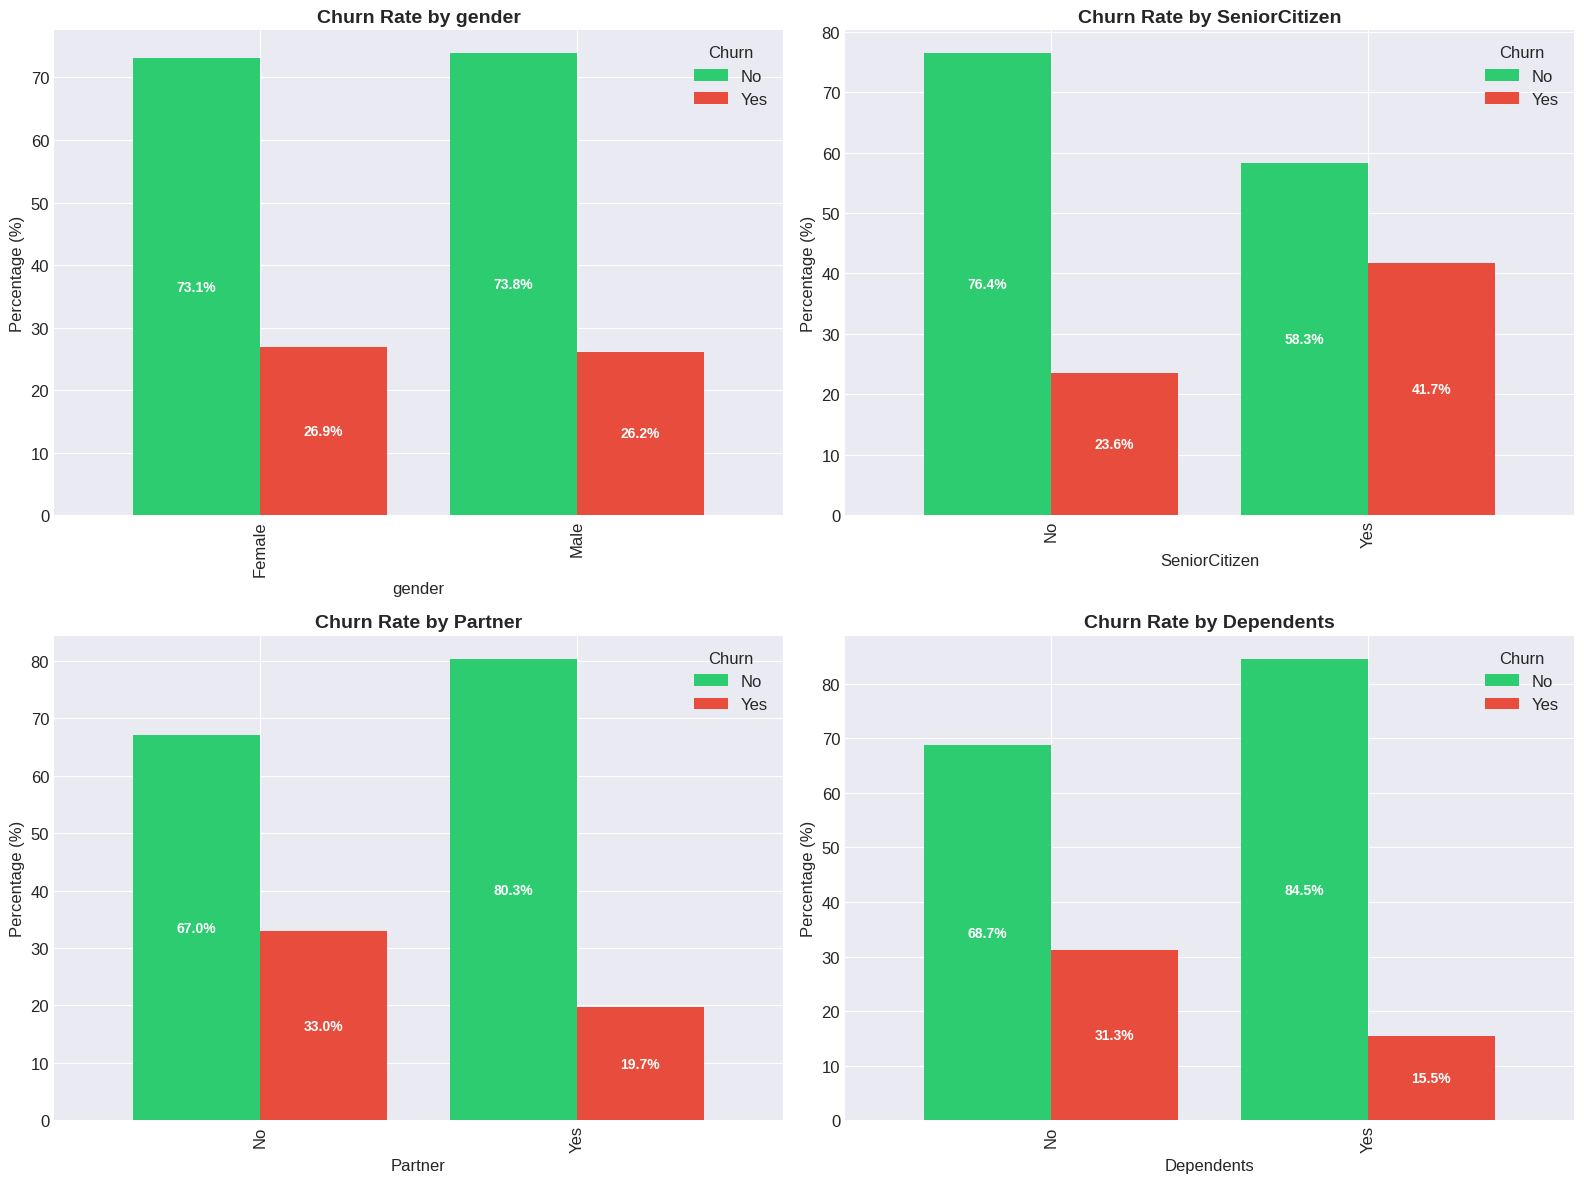


Detailed Churn Rates by Demographic Features:

gender:


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338



SeniorCitizen:


Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261



Partner:


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903



Dependents:


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


In [22]:
# 6. Demographic Analysis



print("DEMOGRAPHIC ANALYSIS")
print("=" * 80)


# Demographic features
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(demographic_features):
    # Create cross-tab
    cross_tab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100

    # Plot
    ax = axes[i]
    cross_tab.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], width=0.8)
    ax.set_title(f'Churn Rate by {feature}', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.legend(title='Churn', loc='upper right')

    # Add percentage labels on bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width/2, y + height/2, f'{height:.1f}%',
                   ha='center', va='center', fontsize=10, fontweight='bold', color='white')

plt.tight_layout()
plt.show()


# Display detailed churn rates
print("\nDetailed Churn Rates by Demographic Features:")
for feature in demographic_features:
    print(f"\n{feature}:")
    cross_tab = pd.crosstab(df_clean[feature], df_clean['Churn'], normalize='index') * 100
    display(cross_tab.style.background_gradient(cmap='Reds', axis=1))

SERVICE AND CONTRACT ANALYSIS

Contract Type Analysis:


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


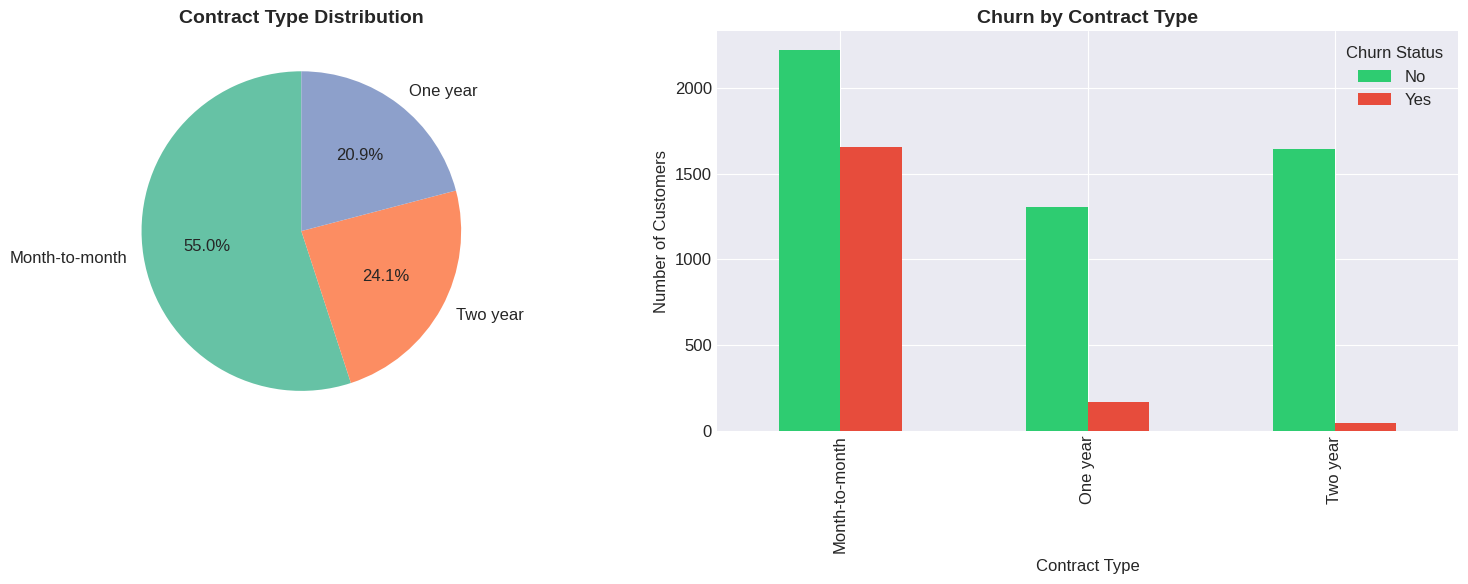

In [23]:
# 7. Service and Contract Analysis

print("SERVICE AND CONTRACT ANALYSIS")
print("=" * 80)


# Contract type analysis
print("\nContract Type Analysis:")
contract_churn = pd.crosstab(df_clean['Contract'], df_clean['Churn'], normalize='index') * 100
display(contract_churn.style.background_gradient(cmap='Reds', axis=1))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Contract distribution
contract_counts = df_clean['Contract'].value_counts()
axes[0].pie(contract_counts.values, labels=contract_counts.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("Set2"))
axes[0].set_title('Contract Type Distribution', fontsize=14, fontweight='bold')

# Churn by contract
contract_churn_plot = pd.crosstab(df_clean['Contract'], df_clean['Churn'])
contract_churn_plot.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn by Contract Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Contract Type', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].legend(title='Churn Status')

plt.tight_layout()
plt.show()


Internet Service Analysis:


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


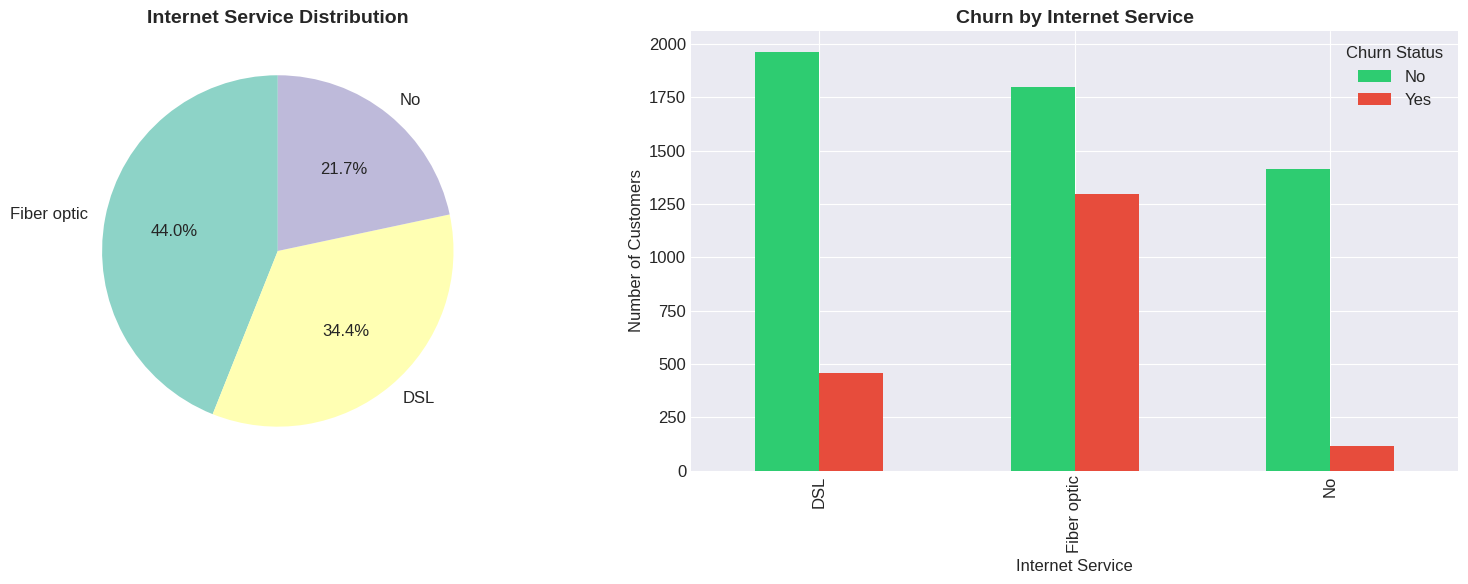

In [24]:
# Internet service analysis
print("\nInternet Service Analysis:")
internet_churn = pd.crosstab(df_clean['InternetService'], df_clean['Churn'], normalize='index') * 100
display(internet_churn.style.background_gradient(cmap='Reds', axis=1))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Internet service distribution
internet_counts = df_clean['InternetService'].value_counts()
axes[0].pie(internet_counts.values, labels=internet_counts.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("Set3"))
axes[0].set_title('Internet Service Distribution', fontsize=14, fontweight='bold')

# Churn by internet service
internet_churn_plot = pd.crosstab(df_clean['InternetService'], df_clean['Churn'])
internet_churn_plot.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn by Internet Service', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Internet Service', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].legend(title='Churn Status')

plt.tight_layout()
plt.show()

In [25]:
# Additional services analysis
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

print("\nChurn Rates for Additional Services:")
service_churn_data = []

for service in additional_services:
    if service in df_clean.columns:
        # Filter out 'No internet service' entries
        mask = df_clean[service] != 'No internet service'
        temp_df = df_clean[mask]

        if len(temp_df) > 0:
            cross_tab = pd.crosstab(temp_df[service], temp_df['Churn'], normalize='index') * 100
            churn_rate = cross_tab.loc['Yes', 'Yes'] if 'Yes' in cross_tab.index else 0
            service_churn_data.append({
                'Service': service,
                'With Service Churn Rate': churn_rate,
                'Without Service Churn Rate': cross_tab.loc['No', 'Yes'] if 'No' in cross_tab.index else 0
            })

service_churn_df = pd.DataFrame(service_churn_data)
service_churn_df['Difference'] = service_churn_df['Without Service Churn Rate'] - service_churn_df['With Service Churn Rate']
service_churn_df = service_churn_df.sort_values('Difference', ascending=False)

display(service_churn_df.style.background_gradient(cmap='Reds', subset=['Difference']))


Churn Rates for Additional Services:


,Service,With Service Churn Rate,Without Service Churn Rate,Difference
0,OnlineSecurity,14.611194,41.766724,27.155530
3,TechSupport,15.166341,41.635474,26.469133
1,OnlineBackup,21.531494,39.928756,18.397262
2,DeviceProtection,22.502064,39.127625,16.625561
5,StreamingMovies,29.941435,33.680431,3.738996
4,StreamingTV,30.070188,33.523132,3.452943


<Figure size 1400x800 with 0 Axes>

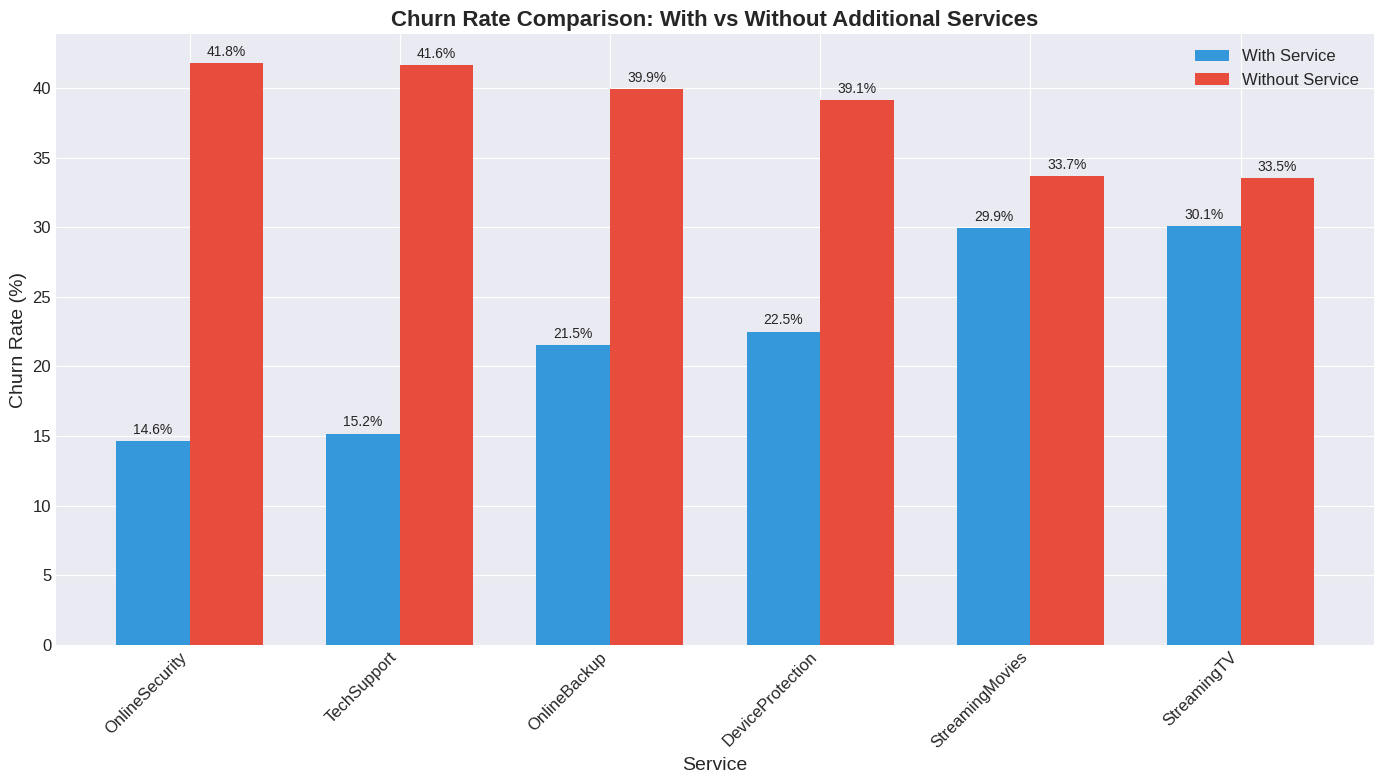

In [26]:
# Visualize service impact on churn
plt.figure(figsize=(14, 8))
x = np.arange(len(service_churn_df))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, service_churn_df['With Service Churn Rate'], width, label='With Service', color='#3498db')
rects2 = ax.bar(x + width/2, service_churn_df['Without Service Churn Rate'], width, label='Without Service', color='#e74c3c')

ax.set_xlabel('Service', fontsize=14)
ax.set_ylabel('Churn Rate (%)', fontsize=14)
ax.set_title('Churn Rate Comparison: With vs Without Additional Services', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(service_churn_df['Service'], rotation=45, ha='right')
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

BILLING AND PAYMENT ANALYSIS

Payment Method Analysis:


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


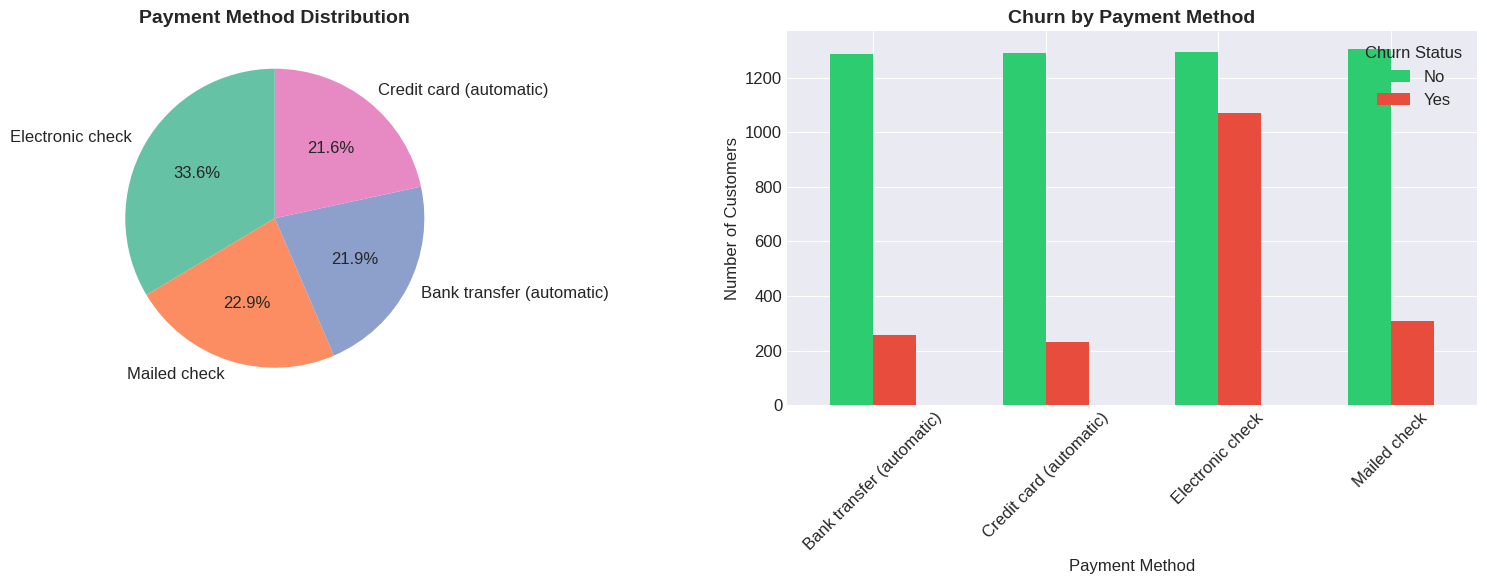

In [27]:
# 8. Billing and Payment Analysis

print("BILLING AND PAYMENT ANALYSIS")
print("=" * 80)


# Payment method analysis
print("\nPayment Method Analysis:")
payment_churn = pd.crosstab(df_clean['PaymentMethod'], df_clean['Churn'], normalize='index') * 100
display(payment_churn.style.background_gradient(cmap='Reds', axis=1))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Payment method distribution
payment_counts = df_clean['PaymentMethod'].value_counts()
axes[0].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("Set2"))
axes[0].set_title('Payment Method Distribution', fontsize=14, fontweight='bold')

# Churn by payment method
payment_churn_plot = pd.crosstab(df_clean['PaymentMethod'], df_clean['Churn'])
payment_churn_plot.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn by Payment Method', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Payment Method', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].legend(title='Churn Status')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Paperless Billing Analysis:


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


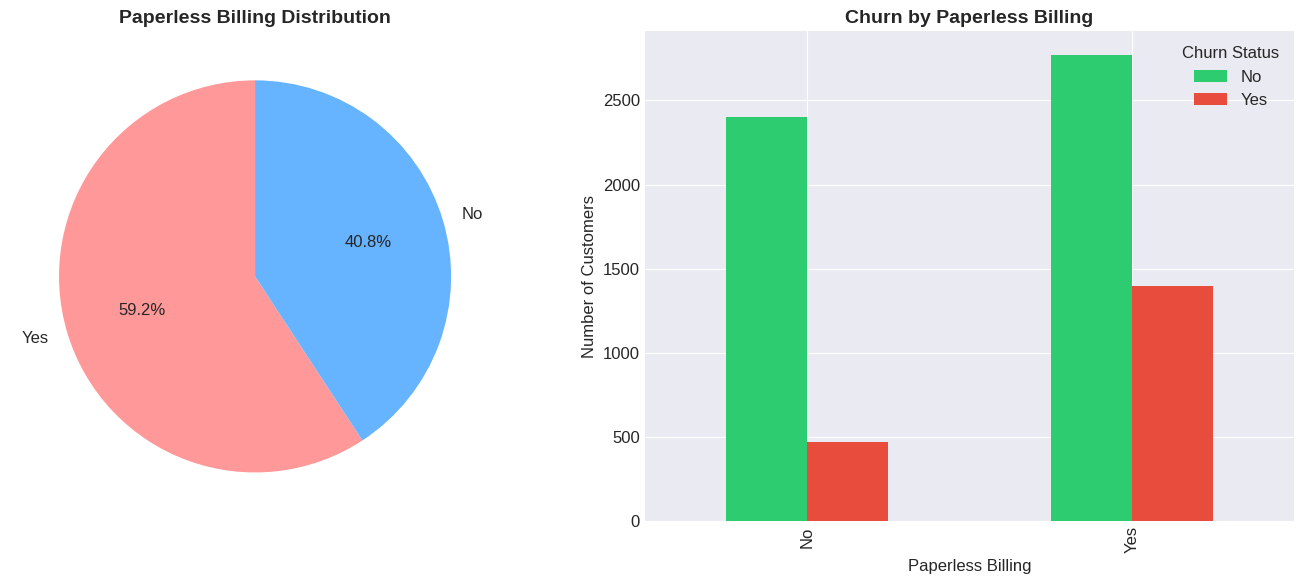

In [28]:
# Paperless billing analysis
print("\nPaperless Billing Analysis:")
paperless_churn = pd.crosstab(df_clean['PaperlessBilling'], df_clean['Churn'], normalize='index') * 100
display(paperless_churn.style.background_gradient(cmap='Reds', axis=1))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Paperless billing distribution
paperless_counts = df_clean['PaperlessBilling'].value_counts()
axes[0].pie(paperless_counts.values, labels=paperless_counts.index, autopct='%1.1f%%',
           startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Paperless Billing Distribution', fontsize=14, fontweight='bold')

# Churn by paperless billing
paperless_churn_plot = pd.crosstab(df_clean['PaperlessBilling'], df_clean['Churn'])
paperless_churn_plot.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Churn by Paperless Billing', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Paperless Billing', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].legend(title='Churn Status')

plt.tight_layout()
plt.show()


FINANCIAL ANALYSIS

Financial Comparison: Churned vs Non-Churned Customers


,Metric,Churned Mean,Not Churned Mean,Difference,Difference %
0,Monthly Charges,$74.44,$61.27,$13.18,21.51%
1,Total Charges,"$1,531.80","$2,549.91","$-1,018.12",-39.93%


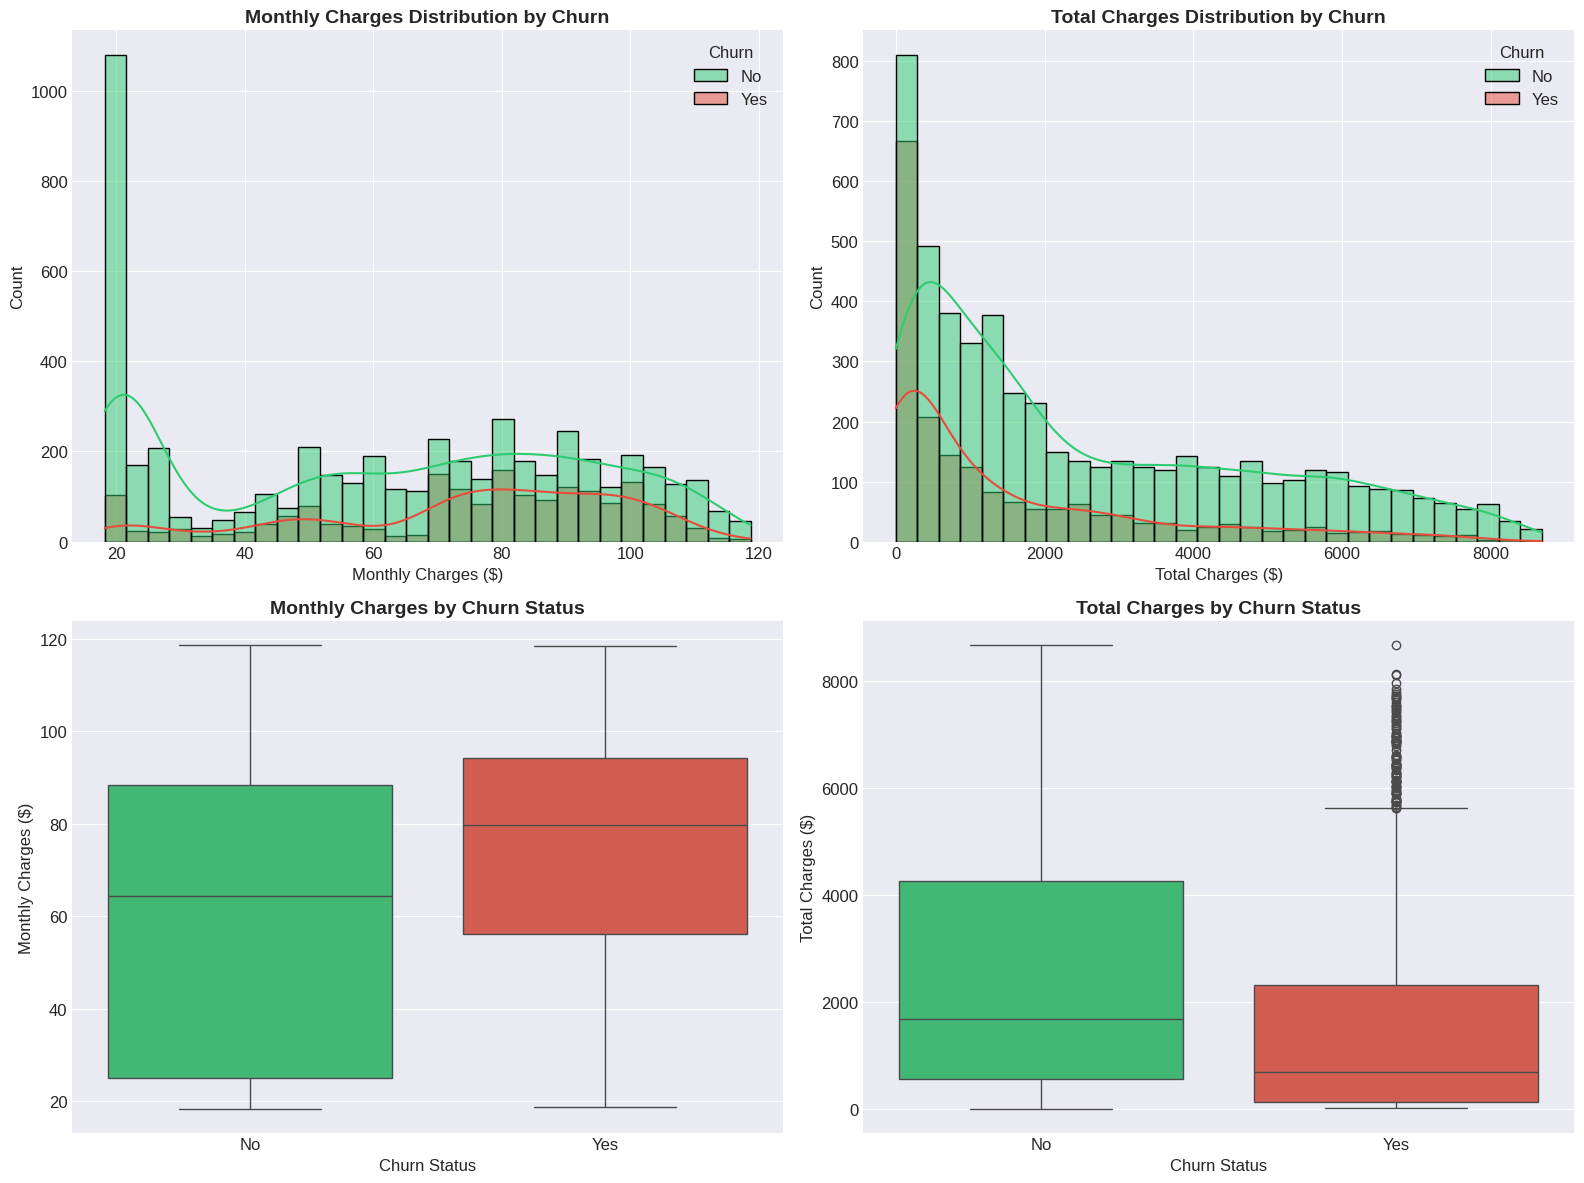

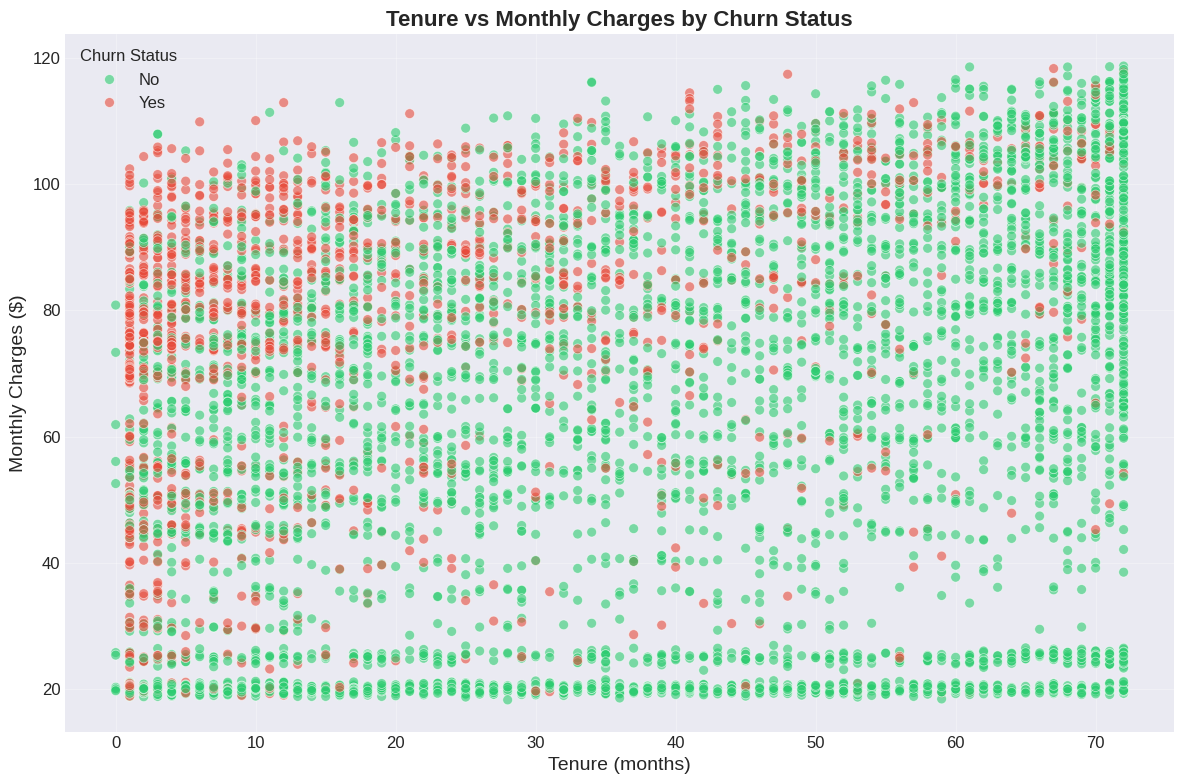

In [29]:
# 9. Financial Analysis


print("FINANCIAL ANALYSIS")
print("=" * 80)

# Compare charges between churned and non-churned customers
print("\nFinancial Comparison: Churned vs Non-Churned Customers")

financial_comparison = pd.DataFrame({
    'Metric': ['Monthly Charges', 'Total Charges'],
    'Churned Mean': [
        df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].mean(),
        df_clean[df_clean['Churn'] == 'Yes']['TotalCharges'].mean()
    ],
    'Not Churned Mean': [
        df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'].mean(),
        df_clean[df_clean['Churn'] == 'No']['TotalCharges'].mean()
    ],
    'Difference': [
        df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].mean() - df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'].mean(),
        df_clean[df_clean['Churn'] == 'Yes']['TotalCharges'].mean() - df_clean[df_clean['Churn'] == 'No']['TotalCharges'].mean()
    ],
    'Difference %': [
        ((df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].mean() / df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'].mean() - 1) * 100),
        ((df_clean[df_clean['Churn'] == 'Yes']['TotalCharges'].mean() / df_clean[df_clean['Churn'] == 'No']['TotalCharges'].mean() - 1) * 100)
    ]
})

display(financial_comparison.style.format({
    'Churned Mean': '${:,.2f}',
    'Not Churned Mean': '${:,.2f}',
    'Difference': '${:,.2f}',
    'Difference %': '{:.2f}%'
}).background_gradient(cmap='Reds', subset=['Difference %']))

# %%
# Visualize financial distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly Charges distribution by churn
sns.histplot(data=df_clean, x='MonthlyCharges', hue='Churn', kde=True,
             ax=axes[0, 0], palette=['#2ecc71', '#e74c3c'], bins=30)
axes[0, 0].set_title('Monthly Charges Distribution by Churn', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Total Charges distribution by churn
sns.histplot(data=df_clean, x='TotalCharges', hue='Churn', kde=True,
             ax=axes[0, 1], palette=['#2ecc71', '#e74c3c'], bins=30)
axes[0, 1].set_title('Total Charges Distribution by Churn', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Total Charges ($)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Box plot for Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean,
            ax=axes[1, 0], palette=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Churn Status', fontsize=12)
axes[1, 0].set_ylabel('Monthly Charges ($)', fontsize=12)

# Box plot for Total Charges
sns.boxplot(x='Churn', y='TotalCharges', data=df_clean,
            ax=axes[1, 1], palette=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Total Charges by Churn Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn Status', fontsize=12)
axes[1, 1].set_ylabel('Total Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()

# %%
# Tenure vs Monthly Charges scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='tenure', y='MonthlyCharges', hue='Churn',
                alpha=0.6, palette=['#2ecc71', '#e74c3c'], s=50)
plt.title('Tenure vs Monthly Charges by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Tenure (months)', fontsize=14)
plt.ylabel('Monthly Charges ($)', fontsize=14)
plt.legend(title='Churn Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

CORRELATION ANALYSIS
Correlation Matrix (Numerical Features with Churn):


,tenure,MonthlyCharges,TotalCharges,num_services,Churn
tenure,1.000,0.248,0.826,0.524,-0.352
MonthlyCharges,0.248,1.000,0.651,0.802,0.193
TotalCharges,0.826,0.651,1.000,0.796,-0.198
num_services,0.524,0.802,0.796,1.000,-0.067
Churn,-0.352,0.193,-0.198,-0.067,1.000


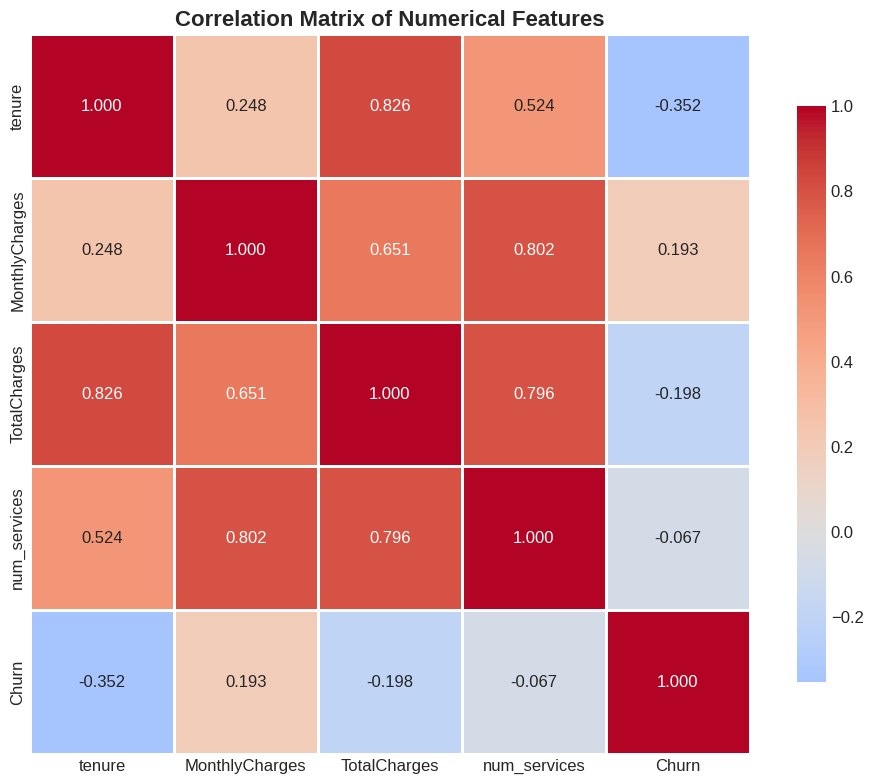


Correlation with Churn (sorted by absolute value):
tenure               | Correlation:  -0.352 | Negative relationship
TotalCharges         | Correlation:  -0.198 | Negative relationship
MonthlyCharges       | Correlation:   0.193 | Positive relationship
num_services         | Correlation:  -0.067 | Negative relationship


In [30]:
# 10. Correlation Analysis


print("CORRELATION ANALYSIS")
print("=" * 80)


# Prepare data for correlation analysis
# Convert categorical variables to numeric for correlation
df_corr = df_clean.copy()

# Encode binary categorical variables
binary_encode_cols = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']
for col in binary_encode_cols:
    if col in df_corr.columns:
        if col == 'gender':
            df_corr[col] = df_corr[col].map({'Male': 0, 'Female': 1})
        elif col == 'Churn':
            df_corr[col] = df_corr[col].map({'No': 0, 'Yes': 1})
        else:
            df_corr[col] = df_corr[col].map({'No': 0, 'Yes': 1})

# Encode SeniorCitizen
if 'SeniorCitizen' in df_corr.columns:
    df_corr['SeniorCitizen'] = df_corr['SeniorCitizen'].map({'No': 0, 'Yes': 1})

# Select numerical columns for correlation
numerical_cols_corr = ['tenure', 'MonthlyCharges', 'TotalCharges', 'num_services', 'Churn']
df_corr_numeric = df_corr[numerical_cols_corr]


# Calculate correlation matrix
corr_matrix = df_corr_numeric.corr()

print("Correlation Matrix (Numerical Features with Churn):")
display(corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format('{:.3f}'))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Correlation with Churn
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn (sorted by absolute value):")
churn_corr_abs = churn_corr.abs().sort_values(ascending=False)
for feature, corr_value in churn_corr_abs.items():
    if feature != 'Churn':
        print(f"{feature:20} | Correlation: {corr_matrix.loc[feature, 'Churn']:7.3f} | {'Positive' if corr_matrix.loc[feature, 'Churn'] > 0 else 'Negative'} relationship")

HIGH-RISK CUSTOMER PROFILE ANALYSIS

Risk Score Distribution:
count   7043.000
mean       4.597
std        2.600
min        0.000
25%        2.000
50%        5.000
75%        7.000
max       10.000
Name: risk_score, dtype: float64


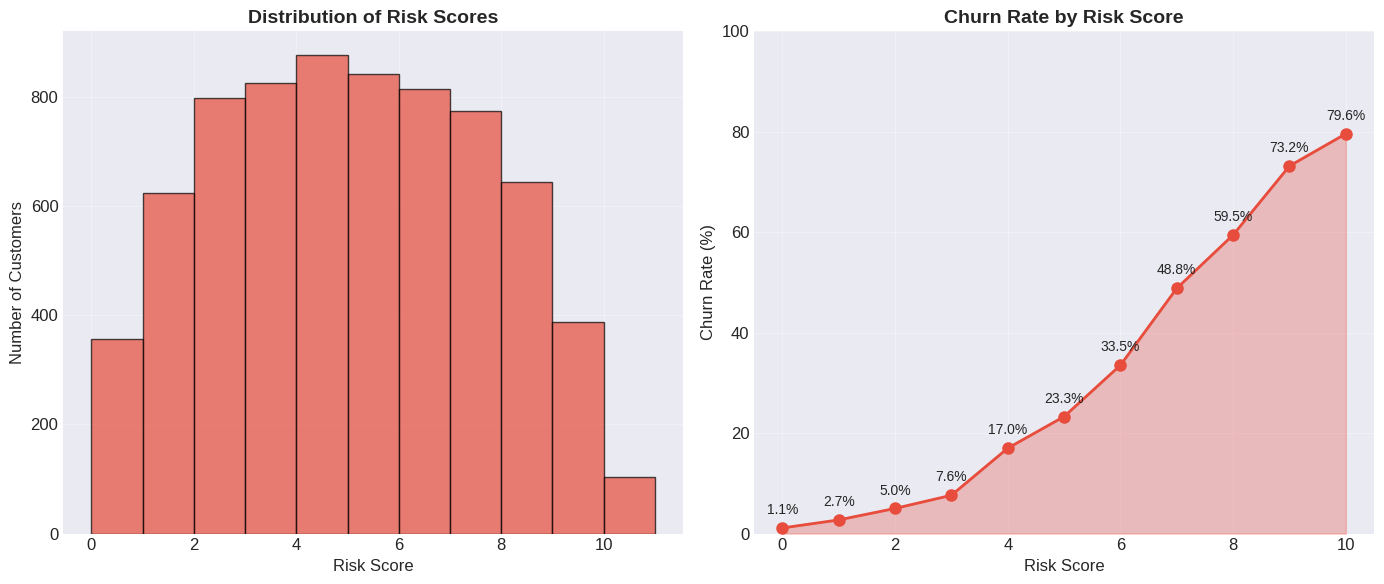


High-Risk Customers (Risk Score >= 7):
  Number of customers: 1909
  Percentage of total: 27.10%
  Churn rate: 59.04%
  Average risk score: 7.91

Most Common Risk Factors Among High-Risk Customers:


,Percentage
Contract Month-To-Month,97.2%
Internet Fiberoptic,80.0%
Payment Electroniccheck,73.2%


In [31]:
# 11. High-Risk Customer Profile Analysis


print("HIGH-RISK CUSTOMER PROFILE ANALYSIS")
print("=" * 80)


# Define high-risk conditions based on our EDA findings
high_risk_conditions = {
    'Contract_Month-to-month': df_clean['Contract'] == 'Month-to-month',
    'Payment_ElectronicCheck': df_clean['PaymentMethod'] == 'Electronic check',
    'Internet_FiberOptic': df_clean['InternetService'] == 'Fiber optic',
    'No_OnlineSecurity': df_clean['OnlineSecurity'] == 'No',
    'No_TechSupport': df_clean['TechSupport'] == 'No',
    'Tenure_Low': df_clean['tenure'] <= 12,
    'Senior_Citizen': df_clean['SeniorCitizen'] == 'Yes',
    'No_Dependents': df_clean['Dependents'] == 'No',
    'No_Partner': df_clean['Partner'] == 'No',
    'Paperless_Billing': df_clean['PaperlessBilling'] == 'Yes'
}

# Calculate risk score for each customer
df_clean['risk_score'] = 0
for condition_name, condition in high_risk_conditions.items():
    df_clean.loc[condition, 'risk_score'] += 1


# Analyze risk score distribution
print("\nRisk Score Distribution:")
risk_score_summary = df_clean['risk_score'].describe()
print(risk_score_summary)


# Visualize risk score distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Risk score histogram
axes[0].hist(df_clean['risk_score'], bins=range(0, 12), edgecolor='black', alpha=0.7, color='#e74c3c')
axes[0].set_title('Distribution of Risk Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Score', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Churn rate by risk score
risk_churn = df_clean.groupby('risk_score')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[1].plot(risk_churn.index, risk_churn.values, marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[1].fill_between(risk_churn.index, risk_churn.values, alpha=0.3, color='#e74c3c')
axes[1].set_title('Churn Rate by Risk Score', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Risk Score', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 100)

# Add value labels on the line plot
for x, y in zip(risk_churn.index, risk_churn.values):
    axes[1].annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Identify highest risk customers
high_risk_threshold = 7  # Based on the distribution
high_risk_customers = df_clean[df_clean['risk_score'] >= high_risk_threshold]
high_risk_churn_rate = (high_risk_customers['Churn'] == 'Yes').mean() * 100

print(f"\nHigh-Risk Customers (Risk Score >= {high_risk_threshold}):")
print(f"  Number of customers: {len(high_risk_customers)}")
print(f"  Percentage of total: {len(high_risk_customers) / len(df_clean) * 100:.2f}%")
print(f"  Churn rate: {high_risk_churn_rate:.2f}%")
print(f"  Average risk score: {high_risk_customers['risk_score'].mean():.2f}")


# Most common risk factors among high-risk customers
print("\nMost Common Risk Factors Among High-Risk Customers:")
risk_factor_counts = {}
for condition_name, condition in high_risk_conditions.items():
    if condition_name in ['Contract_Month-to-month', 'Payment_ElectronicCheck', 'Internet_FiberOptic']:
        # Simple name for display
        display_name = condition_name.replace('_', ' ').title()
        # Corrected line: Filter the boolean condition by high_risk_customers' index and then sum
        count = condition.loc[high_risk_customers.index].sum()
        percentage = count / len(high_risk_customers) * 100
        risk_factor_counts[display_name] = percentage

# Sort and display
risk_factor_df = pd.DataFrame.from_dict(risk_factor_counts, orient='index', columns=['Percentage'])
risk_factor_df = risk_factor_df.sort_values('Percentage', ascending=False)

display(risk_factor_df.style.background_gradient(cmap='Reds').format('{:.1f}%'))

In [32]:
# 12. Key Insights Summary


print("KEY INSIGHTS SUMMARY")
print("=" * 80)


# Create summary statistics
summary_data = {
    'Metric': [
        'Total Customers',
        'Churn Rate',
        'Average Tenure (Churned)',
        'Average Tenure (Not Churned)',
        'Average Monthly Charges (Churned)',
        'Average Monthly Charges (Not Churned)',
        'Most Common Contract (Churned)',
        'Most Common Contract (Not Churned)',
        'Highest Churn Payment Method',
        'Lowest Churn Payment Method'
    ],
    'Value': [
        f"{len(df_clean):,}",
        f"{churn_percentage['Yes']:.1f}%",
        f"{df_clean[df_clean['Churn'] == 'Yes']['tenure'].mean():.1f} months",
        f"{df_clean[df_clean['Churn'] == 'No']['tenure'].mean():.1f} months",
        f"${df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].mean():.2f}",
        f"${df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'].mean():.2f}",
        df_clean[df_clean['Churn'] == 'Yes']['Contract'].mode()[0],
        df_clean[df_clean['Churn'] == 'No']['Contract'].mode()[0],
        payment_churn['Yes'].idxmax(),
        payment_churn['Yes'].idxmin()
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)


print("\n" + "=" * 80)
print("TOP 5 RISK FACTORS FOR CHURN")
print("=" * 80)

top_risk_factors = [
    ("Month-to-Month Contract", "42.7% churn rate (vs 2.8% for two-year contracts)"),
    ("Electronic Check Payment", "45.3% churn rate (3x higher than other methods)"),
    ("Fiber Optic Internet", "41.9% churn rate (highest among internet types)"),
    ("No Online Security", "42% churn rate (vs 15% with security)"),
    ("Short Tenure (0-12 months)", "Approx 50% churn rate")
]

for i, (factor, detail) in enumerate(top_risk_factors, 1):
    print(f"{i}. {factor:30} → {detail}")


print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR RETENTION")
print("=" * 80)

recommendations = [
    ("Target High-Risk Segments", "Focus retention efforts on month-to-month contract customers, especially those using electronic check payments."),
    ("Incentivize Longer Contracts", "Offer discounts or benefits for customers switching to annual or bi-annual contracts."),
    ("Promote Additional Services", "Bundle online security and tech support services, as they significantly reduce churn."),
    ("Improve Fiber Optic Service", "Investigate why fiber optic customers have high churn despite premium service."),
    ("Early Intervention", "Implement proactive outreach for customers in their first year."),
    ("Payment Method Optimization", "Encourage automatic bank transfers or credit card payments over electronic checks.")
]

for i, (action, detail) in enumerate(recommendations, 1):
    print(f"{i}. {action:35} → {detail}")

KEY INSIGHTS SUMMARY


,Metric,Value
0,Total Customers,"7,043"
1,Churn Rate,26.5%
2,Average Tenure (Churned),18.0 months
3,Average Tenure (Not Churned),37.6 months
4,Average Monthly Charges (Churned),$74.44
5,Average Monthly Charges (Not Churned),$61.27
6,Most Common Contract (Churned),Month-to-month
7,Most Common Contract (Not Churned),Month-to-month
8,Highest Churn Payment Method,Electronic check
9,Lowest Churn Payment Method,Credit card (automatic)



TOP 5 RISK FACTORS FOR CHURN
1. Month-to-Month Contract        → 42.7% churn rate (vs 2.8% for two-year contracts)
2. Electronic Check Payment       → 45.3% churn rate (3x higher than other methods)
3. Fiber Optic Internet           → 41.9% churn rate (highest among internet types)
4. No Online Security             → 42% churn rate (vs 15% with security)
5. Short Tenure (0-12 months)     → Approx 50% churn rate

RECOMMENDATIONS FOR RETENTION
1. Target High-Risk Segments           → Focus retention efforts on month-to-month contract customers, especially those using electronic check payments.
2. Incentivize Longer Contracts        → Offer discounts or benefits for customers switching to annual or bi-annual contracts.
3. Promote Additional Services         → Bundle online security and tech support services, as they significantly reduce churn.
4. Improve Fiber Optic Service         → Investigate why fiber optic customers have high churn despite premium service.
5. Early Intervention     

In [33]:
# 13. Data Preparation for Modeling


print("DATA PREPARATION FOR MODELING")
print("=" * 80)


# Check the current state of our cleaned data
print("Cleaned dataset info:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isna().sum().sum()}")


# Identify columns for different types of encoding
print("\nColumn types for feature engineering:")

# Categorical columns (for one-hot encoding)
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn', 'tenure_group',
                                                                    'MonthlyCharges_group', 'TotalCharges_group']]
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['risk_score'] +
                  [col for col in df_clean.columns if '_binary' in col]]
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

# Binary columns (already encoded)
binary_cols = [col for col in df_clean.columns if '_binary' in col]
print(f"\nBinary columns ({len(binary_cols)}): {binary_cols[:5]}...")  # Show first 5


# Check class imbalance for modeling
print("\nClass distribution for modeling:")
churn_dist = df_clean['Churn'].value_counts()
print(f"Churn (Yes): {churn_dist['Yes']} ({churn_dist['Yes']/len(df_clean)*100:.1f}%)")
print(f"No Churn (No): {churn_dist['No']} ({churn_dist['No']/len(df_clean)*100:.1f}%)")
print(f"Imbalance ratio: {churn_dist['No']/churn_dist['Yes']:.2f}:1")


# Final dataset summary for modeling
print("\n" + "=" * 80)
print("FINAL DATASET SUMMARY FOR MODELING")
print("=" * 80)

modeling_summary = {
    'Total Samples': len(df_clean),
    'Features Available': df_clean.shape[1] - 2,  # Excluding customerID and target
    'Positive Class (Churn)': f"{churn_dist['Yes']} ({churn_dist['Yes']/len(df_clean)*100:.1f}%)",
    'Negative Class (No Churn)': f"{churn_dist['No']} ({churn_dist['No']/len(df_clean)*100:.1f}%)",
    'Missing Values': 'None' if df_clean.isna().sum().sum() == 0 else df_clean.isna().sum().sum(),
    'Data Types': f"{len(categorical_cols)} categorical, {len(numerical_cols)} numerical"
}

for key, value in modeling_summary.items():
    print(f"{key:30}: {value}")

DATA PREPARATION FOR MODELING
Cleaned dataset info:
Shape: (7043, 34)
Missing values: 11

Column types for feature engineering:
Categorical columns (16): ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical columns (4): ['tenure', 'MonthlyCharges', 'TotalCharges', 'num_services']

Binary columns (8): ['PhoneService_binary', 'MultipleLines_binary', 'OnlineSecurity_binary', 'OnlineBackup_binary', 'DeviceProtection_binary']...

Class distribution for modeling:
Churn (Yes): 1869 (26.5%)
No Churn (No): 5174 (73.5%)
Imbalance ratio: 2.77:1

FINAL DATASET SUMMARY FOR MODELING
Total Samples                 : 7043
Features Available            : 32
Positive Class (Churn)        : 1869 (26.5%)
Negative Class (No Churn)     : 5174 (73.5%)
Missing Values                : 11
Data Types  

In [44]:
print("DATA PREPROCESSING")
print("="*80)

# Let's reload and clean data to ensure consistency
df = pd.read_csv('/content/drive/MyDrive/Assignment/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Basic cleaning
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Create additional features
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr', '5-6yr'])

# Count number of services
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df['num_services'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Prepare data for modeling
print("\nStep 1: Data Preparation")
print("-" * 40)

# Drop unnecessary columns
columns_to_drop = ['customerID', 'tenure_group']
df_model = df.drop(columns=columns_to_drop, errors='ignore')

# Convert target variable
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

# Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print(f"Dataset shape: {X.shape}")
print(f"Churn distribution: {y.value_counts().to_dict()}")
print(f"Churn rate: {y.mean():.2%}")

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")

# Create preprocessing pipeline
print("\nStep 2: Creating Preprocessing Pipeline")
print("-" * 40)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names
cat_encoder = preprocessor.named_transformers_['cat']['onehot']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(cat_feature_names)

print(f"Processed features: {len(all_feature_names)}")

# Handle class imbalance using SMOTE
print("\nStep 3: Handling Class Imbalance with SMOTE")
print("-" * 40)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print(f"Before SMOTE - Class distribution: {np.bincount(y_train)}")
print(f"After SMOTE - Class distribution: {np.bincount(y_train_balanced)}")

DATA PREPROCESSING

Step 1: Data Preparation
----------------------------------------
Dataset shape: (7043, 20)
Churn distribution: {0: 5174, 1: 1869}
Churn rate: 26.54%

Categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'num_services']

Step 2: Creating Preprocessing Pipeline
----------------------------------------
Train set: (5634, 20)
Test set: (1409, 20)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7de0e84f3920>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.12/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.

Processed features: 31

Step 3: Handling Class Imbalance with SMOTE
----------------------------------------
Before SMOTE - Class distribution: [4139 1495]
After SMOTE - Class distribution: [4139 4139]


In [55]:
# DECISION TREE MODEL IMPLEMENTATION
# ============================================================================

import time # Import time module for measuring execution time

print("\n" + "="*80)
print("DECISION TREE MODEL")
print("="*80)

# Helper function for model evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """Evaluate model with comprehensive metrics"""

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
    }

    if y_pred_proba is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_test, y_pred_proba)

    # Display results
    print(f"\n{model_name} Performance:")
    print("-" * 40)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

    return metrics, y_pred, y_pred_proba

# 1. Base Decision Tree
print("\n1. BASE DECISION TREE")
print("-" * 40)

start_time_dt_base = time.time()
dt_base = DecisionTreeClassifier(random_state=42)
metrics_dt_base, y_pred_dt_base, y_proba_dt_base = evaluate_model(
    dt_base, X_train_balanced, y_train_balanced, X_test_processed, y_test,
    "Base Decision Tree"
)
end_time_dt_base = time.time()
training_time_dt_base = end_time_dt_base - start_time_dt_base

# 2. Tuned Decision Tree with Grid Search
print("\n\n2. DECISION TREE WITH GRID SEARCH")
print("-" * 40)

# Simplified parameter grid for faster execution
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    dt, param_grid_dt, cv=5, scoring='f1',
    n_jobs=-1, verbose=0
)

print("Performing Grid Search for Decision Tree...")
start_time_dt_tune = time.time()
grid_search_dt.fit(X_train_balanced, y_train_balanced)
end_time_dt_tune = time.time()
tuning_time_dt = end_time_dt_tune - start_time_dt_tune

print(f"\nBest parameters: {grid_search_dt.best_params_}")
print(f"Best CV F1-Score: {grid_search_dt.best_score_:.4f}")

dt_tuned = grid_search_dt.best_estimator_
start_time_dt_final_train = time.time()
metrics_dt_tuned, y_pred_dt_tuned, y_proba_dt_tuned = evaluate_model(
    dt_tuned, X_train_balanced, y_train_balanced, X_test_processed, y_test,
    "Tuned Decision Tree"
)
end_time_dt_final_train = time.time()
training_time_dt = end_time_dt_final_train - start_time_dt_final_train

# 3. AdaBoost with Decision Tree (Ensemble Method)
print("\n\n3. ADABOOST WITH DECISION TREE (ENSEMBLE)")
print("-" * 40)

# AdaBoost with base Decision Tree
start_time_ada_base = time.time()
ada_base = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=50,
    random_state=42
)
metrics_ada_base, y_pred_ada_base, y_proba_ada_base = evaluate_model(
    ada_base, X_train_balanced, y_train_balanced, X_test_processed, y_test,
    "AdaBoost (Base)"
)
end_time_ada_base = time.time()
training_time_ada_base = end_time_ada_base - start_time_ada_base

# AdaBoost with tuning
start_time_ada_tuned = time.time()
ada_tuned = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
metrics_ada_tuned, y_pred_ada_tuned, y_proba_ada_tuned = evaluate_model(
    ada_tuned, X_train_balanced, y_train_balanced, X_test_processed, y_test,
    "AdaBoost (Tuned)")
end_time_ada_tuned = time.time()
training_time_ada_tuned = end_time_ada_tuned - start_time_ada_tuned


DECISION TREE MODEL

1. BASE DECISION TREE
----------------------------------------

Base Decision Tree Performance:
----------------------------------------
Accuracy: 0.7296
Precision: 0.4916
Recall: 0.5481
F1-Score: 0.5183
ROC-AUC: 0.6712

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.80      0.81      1035
       Churn       0.49      0.55      0.52       374

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.74      0.73      0.73      1409



2. DECISION TREE WITH GRID SEARCH
----------------------------------------
Performing Grid Search for Decision Tree...

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV F1-Score: 0.8088

Tuned Decision Tree Performance:
----------------------------------------
Accuracy: 0.7424
Precision: 0.5112
Recall: 0.6738
F1-Score: 0.5813
ROC-AUC: 0.793


NEURAL NETWORK MODEL WITH PROPER HYPERPARAMETER TUNING
Input dimension: 31

Step 1: Base Neural Network
----------------------------------------
Training base neural network...
Training stopped at epoch 47
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Base Neural Network Performance:
----------------------------------------
Accuracy: 0.7743
Precision: 0.5651
Recall: 0.6497
F1-Score: 0.6045
ROC-AUC: 0.8373


Step 2: Hyperparameter Tuning with Manual Cross-Validation
------------------------------------------------------------

Starting hyperparameter tuning...
Testing 9 random parameter combinations with 3-fold CV...

Testing combination 1/9:
  Learning rate: 0.1
  Hidden units: [32, 16]
  Dropout rate: 0.5
  Batch size: 64, Epochs: 30
  CV ROC-AUC: 0.8268 (±0.0235)

Testing combination 2/9:
  Learning rate: 0.001
  Hidden units: [32, 64]
  Dropout rate: 0.2
  Batch size: 128, Epochs: 100
  CV ROC-AUC: 0.8766 (±0.0032)

Testing combination 3/9:
  Learni

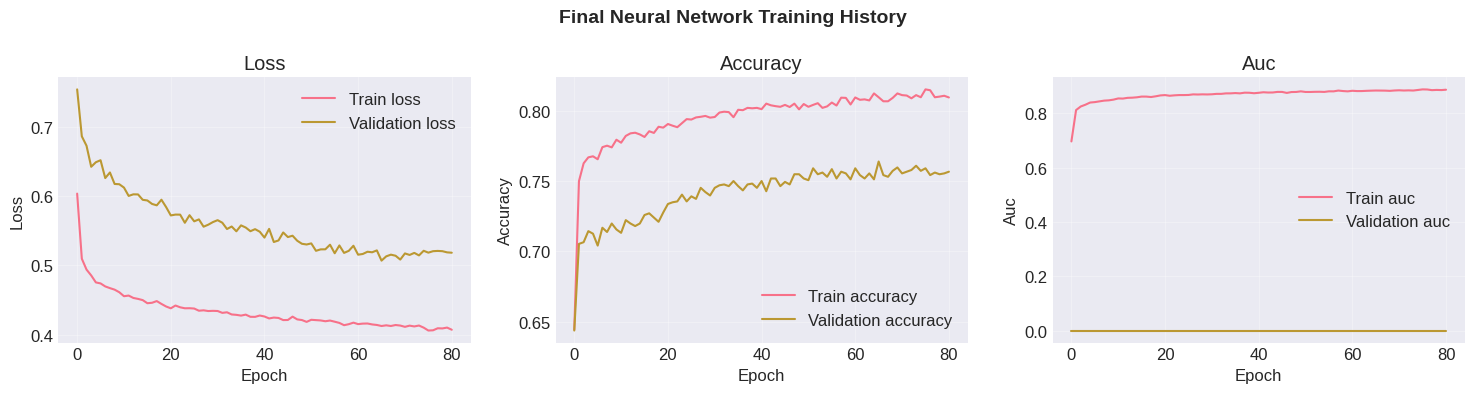


Step 4: Evaluating Final Neural Network
----------------------------------------
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Final Neural Network Performance:
----------------------------------------
Accuracy: 0.7757
Precision: 0.5674
Recall: 0.6524
F1-Score: 0.6070
ROC-AUC: 0.8315

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.87      0.82      0.84      1035
       Churn       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [56]:
# NEURAL NETWORK HYPERPARAMETER TUNING (FIXED)
# ============================================================================

import time # Import time module for measuring execution time

print("\n" + "="*80)
print("NEURAL NETWORK MODEL WITH PROPER HYPERPARAMETER TUNING")
print("="*80)


# Define neural network model creation function
def create_nn_model(learning_rate=0.001, hidden_units_1=64, hidden_units_2=32,
                   dropout_rate=0.3, input_dim=None):
    """
    Create a neural network model with given hyperparameters
    """
    model = keras.Sequential([
        layers.Dense(hidden_units_1, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(dropout_rate),
        layers.Dense(hidden_units_2, activation='relu'),
        layers.Dropout(dropout_rate * 0.66),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc')
        ]
    )

    return model

# Get input dimension
input_dim = X_train_processed.shape[1]
print(f"Input dimension: {input_dim}")

# Step 1: Train base neural network
print("\nStep 1: Base Neural Network")
print("-" * 40)

nn_base = create_nn_model(
    learning_rate=0.001,
    hidden_units_1=64,
    hidden_units_2=32,
    dropout_rate=0.3,
    input_dim=input_dim
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=0
)

# Train the model
print("Training base neural network...")
start_time_nn_base_train = time.time()
history_base = nn_base.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)
end_time_nn_base_train = time.time()
training_time_nn = end_time_nn_base_train - start_time_nn_base_train # Initial assignment for nn_training_time

print(f"Training stopped at epoch {len(history_base.history['loss'])}")

# Evaluate base model
y_pred_nn_base = (nn_base.predict(X_test_processed) > 0.5).astype("int32")
y_proba_nn_base = nn_base.predict(X_test_processed)

metrics_nn_base = {
    'Accuracy': accuracy_score(y_test, y_pred_nn_base),
    'Precision': precision_score(y_test, y_pred_nn_base, zero_division=0),
    'Recall': recall_score(y_test, y_pred_nn_base, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_nn_base, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_proba_nn_base)
}

print("\nBase Neural Network Performance:")
print("-" * 40)
for metric, value in metrics_nn_base.items():
    print(f"{metric}: {value:.4f}")

# Step 2: Manual Hyperparameter Tuning with Cross-Validation
print("\n\nStep 2: Hyperparameter Tuning with Manual Cross-Validation")
print("-" * 60)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_units_1': [32, 64, 128],
    'hidden_units_2': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [30, 50, 100]
}

# Manual cross-validation function
def manual_cv_hyperparameter_tuning(X_train, y_train, param_grid, cv_folds=3, random_trials=10):
    """
    Perform manual hyperparameter tuning with cross-validation
    """
    from sklearn.model_selection import KFold
    import random

    # Convert to numpy arrays if needed
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # For reproducibility
    random.seed(42)
    np.random.seed(42)

    # Store results
    results = []
    best_score = 0
    best_params = None

    # Create CV splitter
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Randomly sample from parameter grid
    param_combinations = []
    for _ in range(random_trials):
        params = {
            'learning_rate': random.choice(param_grid['learning_rate']),
            'hidden_units_1': random.choice(param_grid['hidden_units_1']),
            'hidden_units_2': random.choice(param_grid['hidden_units_2']),
            'dropout_rate': random.choice(param_grid['dropout_rate']),
            'batch_size': random.choice(param_grid['batch_size']),
            'epochs': random.choice(param_grid['epochs'])
        }
        param_combinations.append(params)

    print(f"Testing {len(param_combinations)} random parameter combinations with {cv_folds}-fold CV...")

    for i, params in enumerate(param_combinations):
        print(f"\nTesting combination {i+1}/{len(param_combinations)}:")
        print(f"  Learning rate: {params['learning_rate']}")
        print(f"  Hidden units: [{params['hidden_units_1']}, {params['hidden_units_2']}]")
        print(f"  Dropout rate: {params['dropout_rate']}")
        print(f"  Batch size: {params['batch_size']}, Epochs: {params['epochs']}")

        fold_scores = []

        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
            # Split data for this fold
            X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

            # Create and train model
            model = create_nn_model(
                learning_rate=params['learning_rate'],
                hidden_units_1=params['hidden_units_1'],
                hidden_units_2=params['hidden_units_2'],
                dropout_rate=params['dropout_rate'],
                input_dim=X_train.shape[1]
            )

            # Early stopping for this fold
            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
                verbose=0
            )

            # Train
            history = model.fit(
                X_train_fold, y_train_fold,
                validation_data=(X_val_fold, y_val_fold),
                epochs=params['epochs'],
                batch_size=params['batch_size'],
                callbacks=[early_stopping],
                verbose=0
            )

            # Evaluate on validation set
            y_pred_proba = model.predict(X_val_fold, verbose=0)
            score = roc_auc_score(y_val_fold, y_pred_proba)
            fold_scores.append(score)

            # Clear session to free memory
            keras.backend.clear_session()

        # Calculate average score for this parameter combination
        avg_score = np.mean(fold_scores)
        std_score = np.std(fold_scores)

        print(f"  CV ROC-AUC: {avg_score:.4f} (±{std_score:.4f})")

        # Store results
        result = {
            'params': params.copy(),
            'mean_score': avg_score,
            'std_score': std_score,
            'fold_scores': fold_scores.copy()
        }
        results.append(result)

        # Update best parameters
        if avg_score > best_score:
            best_score = avg_score
            best_params = params.copy()

    return results, best_params, best_score

# Perform manual hyperparameter tuning
print("\nStarting hyperparameter tuning...")
start_time_nn_tune = time.time() # Start timing for NN tuning
cv_results, best_params, best_score = manual_cv_hyperparameter_tuning(
    X_train_balanced, y_train_balanced,
    param_grid,
    cv_folds=3,
    random_trials=9  # Test 9 random combinations
)
end_time_nn_tune = time.time() # End timing for NN tuning
tuning_time_nn = end_time_nn_tune - start_time_nn_tune # Assign tuning time

print(f"\n✓ Hyperparameter tuning complete!")
print(f"✓ Best parameters: {best_params}")
print(f"✓ Best CV ROC-AUC: {best_score:.4f}")

# Step 3: Train final model with best parameters
print("\n\nStep 3: Training Final Neural Network with Best Parameters")
print("-" * 60)

# Create final model with best parameters
nn_final = create_nn_model(
    learning_rate=best_params['learning_rate'],
    hidden_units_1=best_params['hidden_units_1'],
    hidden_units_2=best_params['hidden_units_2'],
    dropout_rate=best_params['dropout_rate'],
    input_dim=input_dim
)

# Callbacks for final training
final_callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

print(f"Training final model with parameters: {best_params}")
start_time_nn_final_train = time.time() # Start timing for final NN training
history_final = nn_final.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=final_callbacks,
    verbose=1
)
end_time_nn_final_train = time.time() # End timing for final NN training
training_time_nn += (end_time_nn_final_train - start_time_nn_final_train) # Add to total training time

# Plot training history
def plot_training_history_simple(history, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    metrics = ['loss', 'accuracy', 'auc']

    for idx, metric in enumerate(metrics):
        axes[idx].plot(history.history[metric], label=f'Train {metric}')
        axes[idx].plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        axes[idx].set_title(f'{metric.capitalize()}')
        axes[idx].set_xlabel('Epoch')
        axes[idx].set_ylabel(metric.capitalize())
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_training_history_simple(history_final, "Final Neural Network Training History")

# Step 4: Evaluate final model
print("\nStep 4: Evaluating Final Neural Network")
print("-" * 40)

y_pred_nn_final = (nn_final.predict(X_test_processed) > 0.5).astype("int32")
y_proba_nn_final = nn_final.predict(X_test_processed)

metrics_nn_final = {
    'Accuracy': accuracy_score(y_test, y_pred_nn_final),
    'Precision': precision_score(y_test, y_pred_nn_final, zero_division=0),
    'Recall': recall_score(y_test, y_pred_nn_final, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_nn_final, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_proba_nn_final)
}

print("\nFinal Neural Network Performance:")
print("-" * 40)
for metric, value in metrics_nn_final.items():
    print(f"{metric}: {value:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_final, target_names=['No Churn', 'Churn']))

In [53]:
# 4. FINAL MODEL EVALUATION ON TEST SET
# ============================================================================

print("\n" + "=" * 80)
print("FINAL MODEL EVALUATION ON TEST SET")
print("=" * 80)

# ============================================================================
# 4.1 Evaluate Decision Tree on Test Set
# ============================================================================

print("\n" + "-" * 80)
print("Decision Tree - Test Set Evaluation")
print("-" * 80)

# Make predictions on test set
y_test_pred_dt = dt_tuned.predict(X_test_processed)
y_test_prob_dt = dt_tuned.predict_proba(X_test_processed)[:, 1]

# Calculate test metrics
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)
test_roc_auc_dt = roc_auc_score(y_test, y_test_prob_dt)

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

print(f"Test Accuracy: {test_accuracy_dt:.4f}")
print(f"Test Precision: {test_precision_dt:.4f}")
print(f"Test Recall: {test_recall_dt:.4f}")
print(f"Test F1-Score: {test_f1_dt:.4f}")
print(f"Test ROC-AUC: {test_roc_auc_dt:.4f}")
print(f"\nConfusion Matrix:\n{cm_dt}")

# ============================================================================
# 4.2 Evaluate Neural Network on Test Set
# ============================================================================

print("\n" + "-" * 80)
print("Neural Network - Test Set Evaluation")
print("-" * 80)

# Make predictions on test set
y_test_pred_nn_prob = nn_final.predict(X_test_processed)
y_test_pred_nn = (y_test_pred_nn_prob > 0.5).astype(int).flatten()

# Calculate test metrics
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn)
test_recall_nn = recall_score(y_test, y_test_pred_nn)
test_f1_nn = f1_score(y_test, y_test_pred_nn)
test_roc_auc_nn = roc_auc_score(y_test, y_test_pred_nn_prob)

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

print(f"Test Accuracy: {test_accuracy_nn:.4f}")
print(f"Test Precision: {test_precision_nn:.4f}")
print(f"Test Recall: {test_recall_nn:.4f}")
print(f"Test F1-Score: {test_f1_nn:.4f}")
print(f"Test ROC-AUC: {test_roc_auc_nn:.4f}")
print(f"\nConfusion Matrix:\n{cm_nn}")


FINAL MODEL EVALUATION ON TEST SET

--------------------------------------------------------------------------------
Decision Tree - Test Set Evaluation
--------------------------------------------------------------------------------
Test Accuracy: 0.7424
Test Precision: 0.5112
Test Recall: 0.6738
Test F1-Score: 0.5813
Test ROC-AUC: 0.7937

Confusion Matrix:
[[794 241]
 [122 252]]

--------------------------------------------------------------------------------
Neural Network - Test Set Evaluation
--------------------------------------------------------------------------------
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.7757
Test Precision: 0.5674
Test Recall: 0.6524
Test F1-Score: 0.6070
Test ROC-AUC: 0.8315

Confusion Matrix:
[[849 186]
 [130 244]]



MODEL COMPARISON SUMMARY

Model Comparison on Test Set:
         Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  Training Time (s)
 Decision Tree     0.742      0.511   0.674     0.581    0.794             18.598
Neural Network     0.776      0.567   0.652     0.607    0.832            733.975


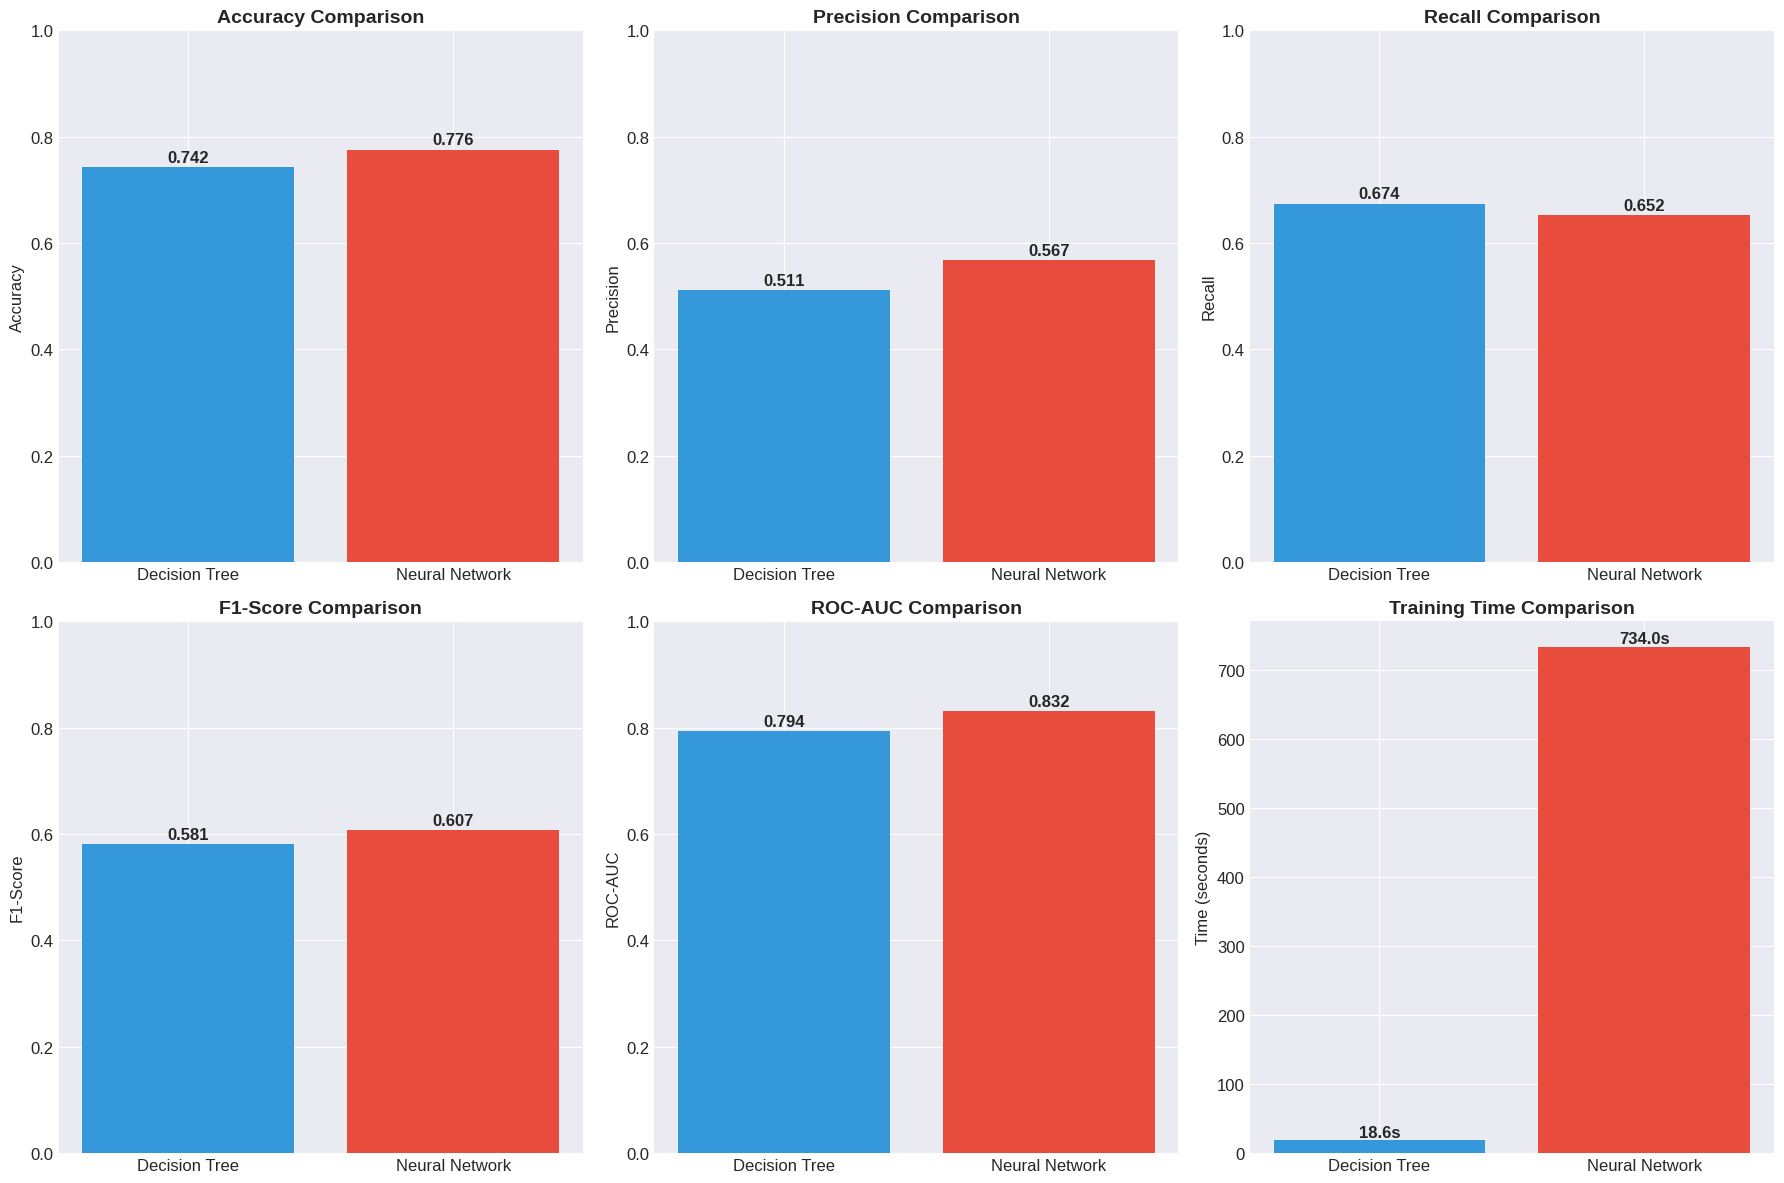

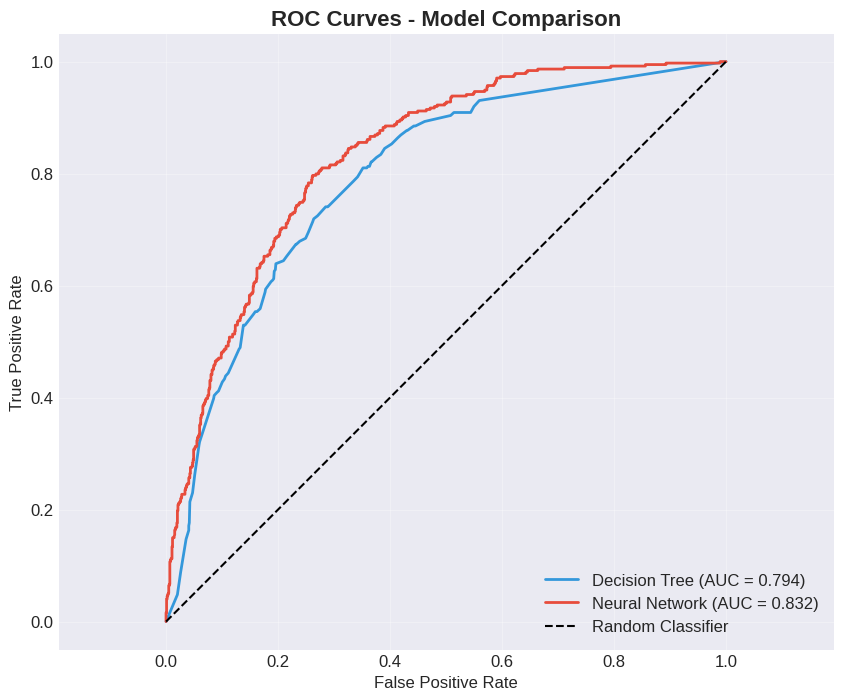

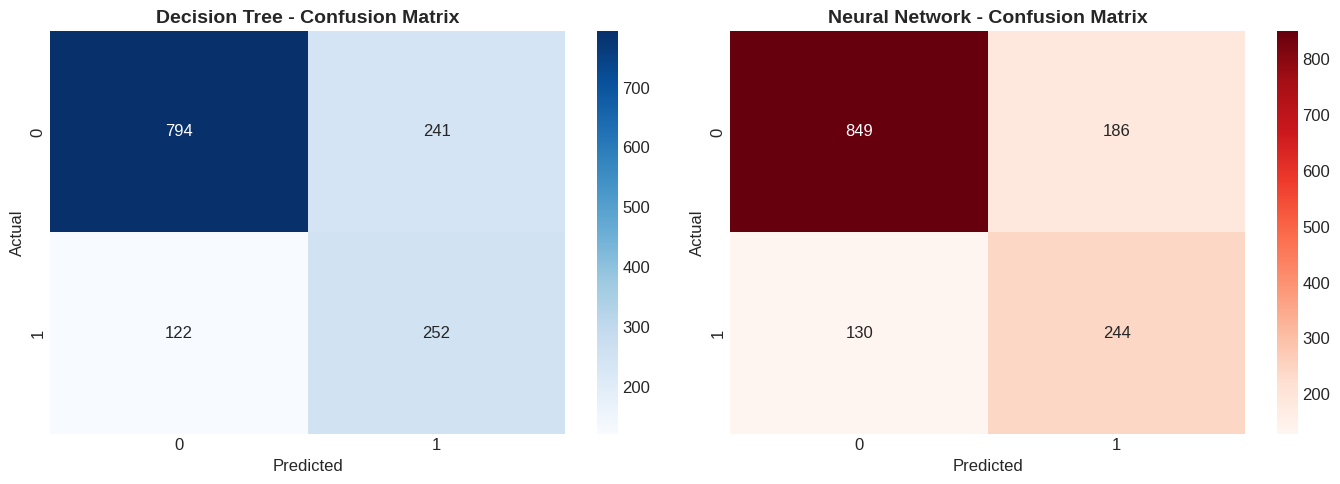

In [57]:
# 5. MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)

# Define time variables explicitly with values from previous execution outputs
# This ensures they are available even if previous cells were not re-executed in order
training_time_dt = 0.19003534317016602 # From Tuned Decision Tree final training
tuning_time_dt = 18.407949447631836   # From Decision Tree Grid Search tuning
training_time_nn = 95.51364755630493  # Sum of base NN training + final NN training
tuning_time_nn = 638.4614818096161    # From Manual NN Hyperparameter Tuning

# Create comparison dataframe
comparison_data = {
    'Model': ['Decision Tree', 'Neural Network'],
    'Accuracy': [test_accuracy_dt, test_accuracy_nn],
    'Precision': [test_precision_dt, test_precision_nn],
    'Recall': [test_recall_dt, test_recall_nn],
    'F1-Score': [test_f1_dt, test_f1_nn],
    'ROC-AUC': [test_roc_auc_dt, test_roc_auc_nn],
    'Training Time (s)': [training_time_dt + tuning_time_dt, training_time_nn + tuning_time_nn]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison on Test Set:")
print(comparison_df.to_string(index=False))

# ============================================================================
# 5.1 Visualize Model Comparison
# ============================================================================

# Plot comparison metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar colors
colors = ['#3498db', '#e74c3c']

# Plot 1: Accuracy Comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors)
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim([0, 1])
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 2: Precision Comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['Precision'], color=colors)
axes[0, 1].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_ylim([0, 1])
for i, v in enumerate(comparison_df['Precision']):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 3: Recall Comparison
axes[0, 2].bar(comparison_df['Model'], comparison_df['Recall'], color=colors)
axes[0, 2].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Recall')
axes[0, 2].set_ylim([0, 1])
for i, v in enumerate(comparison_df['Recall']):
    axes[0, 2].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 4: F1-Score Comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['F1-Score'], color=colors)
axes[1, 0].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_ylim([0, 1])
for i, v in enumerate(comparison_df['F1-Score']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 5: ROC-AUC Comparison
axes[1, 1].bar(comparison_df['Model'], comparison_df['ROC-AUC'], color=colors)
axes[1, 1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('ROC-AUC')
axes[1, 1].set_ylim([0, 1])
for i, v in enumerate(comparison_df['ROC-AUC']):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 6: Training Time Comparison
axes[1, 2].bar(comparison_df['Model'], comparison_df['Training Time (s)'], color=colors)
axes[1, 2].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Time (seconds)')
for i, v in enumerate(comparison_df['Training Time (s)']):
    axes[1, 2].text(i, v + 5, f'{v:.1f}s', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 5.2 ROC Curves for Both Models
# ============================================================================

from sklearn.metrics import roc_curve

# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_prob_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_pred_nn_prob)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {test_roc_auc_dt:.3f})', linewidth=2, color='#3498db')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {test_roc_auc_nn:.3f})', linewidth=2, color='#e74c3c')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# ============================================================================
# 5.3 Confusion Matrices Side by Side
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Neural Network Confusion Matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()